# Importando as bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Leitura do dataset

In [42]:
df = pd.read_csv("fraud_oracle.csv")


In [43]:
pd.set_option('display.max_columns', None)

df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# **Explicação das Colunas**

**Informações temporais**
* Month - Mês em que o acidente ocorreu                        
* WeekOfMonth - Semana do mês do acidente                               
* DayOfWeek - Dia da semana do acidente
* DayOfWeekClaimed - Dia da semana em que o sinistro foi registrado.
* MonthClaimed - Mês em que o cliente entrou com a reclamação do seguro.
* WeekOfMonthClaimed - Semana do mês em que a reclamação foi registrada. 
* Year - Ano do registro do caso.

**Informações sobre o veículo**
* Make - Fabricante do carro (Honda, Toyota, etc.)   
* NumberOfCars - Número de carros que o segurado possui.
* AgeOfVehicle - Idade do veículo (ex.: “3 years”, “more than 7”).   
* VehicleCategory - Categoria do veículo (ex.: Sedan, SUV, Sports car, Utility, Van)
* VehiclePrice - Preço/valor do veículo       
     
**Informações sobre o acidente**
* AccidentArea -  Local do acidente (Urban ou Rural).  
* PoliceReportFiled - Indica se boletim policial foi registrado (Yes/No).
* WitnessPresent - Se havia testemunha presente (Yes/No).
* Fault - Culpado pelo acidente (ex.: Policy Holder, Third Party, Unknown, Not At Fault).

**Informações sobre o segurado**
* Sex - Sexo do segurado (Male/Female).
* MaritalStatus - Estado civil (Single, Married, etc.).
* Age - Idade do segurado.
* AgeOfPolicyHolder - Faixa etária do segurado (ex.: “26 to 30”).
* AgentType - Tipo do agente de atendimento (Internal/External).

**Histórico de apólice e comportamento**
* Days_Policy_Accident - Tempo entre emissão da apólice e o acidente
* Days_Policy_Claim - Tempo entre emissão da apólice e abertura da reclamação.
* PastNumberOfClaims - Número de sinistros anteriores do segurado.
* NumberOfSuppliments - Número de reavaliações adicionais no processo de sinistro.
* AddressChange_Claim - Tempo desde a última mudança de endereço.
* BasePolicy -  Tipo de cobertura fundamental que acompanha a apólice (Liability, Collision, etc.).
* PolicyType - Tipo de apólice (ex.: Private, Commercial, Corporate, Special)
* PolicyNumber -  Número único da apólice / identificador do cliente.

**Valores e características do processo**
* RepNumber - Identificação do representante ou agente.
* Deductible - Franquia que o cliente deve pagar.
* DriverRating - Nota de risco do motorista (1–4, geralmente).
* FraudFound_P -  Indicador de fraude encontrada/presumida para aquele sinistro 





# Análise Exploratória

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### **Quantidade de Linhas e Colunas no DataSet**

In [45]:
print(f'O dataset possui {df.shape[0]} de linhas')
print(f'O dataset possui {df.shape[1]} de colunas')

O dataset possui 15420 de linhas
O dataset possui 33 de colunas


### Verificando se existem dados nulos

In [46]:
# Quantidade de nulos por coluna
null_count = df.isnull().sum()

# Porcentagem de nulos por coluna
null_percent = (df.isnull().sum() / len(df)) * 100

# Criando novo DataFrame apenas com colunas que possuem nulos
df_nulos = pd.DataFrame({
    'Quantidade de Nulos': null_count,
    'Percentual (%)': null_percent
})

# Filtrar apenas onde há nulos
df_nulos = df_nulos[df_nulos['Quantidade de Nulos'] > 0]

# Ordenar do maior para o menor percentual
df_nulos = df_nulos.sort_values(by='Percentual (%)', ascending=False)

df_nulos

,Quantidade de Nulos,Percentual (%)


Com base no estudo acima, podemos verificar que o dataset não possui nenhum valor nulo

### Verificando se existem valores duplicados

In [47]:
duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")
df[df.duplicated()]

Quantidade de linhas duplicadas: 0


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


Com base no estudo acima, vemos que o dataset não conta com informações duplicadas

### Principais estatísticas das colunas numéricas

In [48]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


### Verificando informações da coluna Age

In [49]:
display(df['Age'].describe())

print("\n")
media = df['Age'].mean()
mediana = df['Age'].median()
moda = df['Age'].mode()[0]

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64



Média: 39.855706874189366
Mediana: 38.0
Moda: 30


# **Análise Univariada**

## Distribuição das variáveis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Deductible'}>],
       [<Axes: title={'center': 'DriverRating'}>, <Axes: >]], dtype=object)

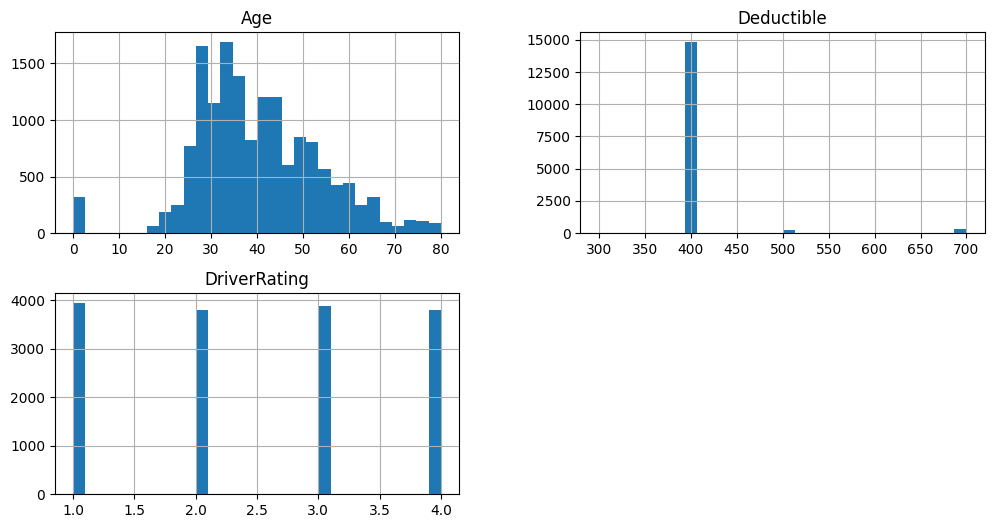

In [77]:
df_analisys = df.drop(columns=['WeekOfMonth', 'WeekOfMonthClaimed',
                               'FraudFound_P', 'PolicyNumber', 'Year', 'RepNumber'])  # remove só para analisar

df_analisys.hist(figsize=(12, 6), bins=30)
 

Limitei o df nessas 3 colunas, pois as demais colunas numéricas, possuem dados como identificação de mês e semana, ano e identificação de representante. Esses dados não são dados significativos para este tipo de análise. Somente para identificação dos casos. 

## Verificando se existem Outliers no dataset

In [51]:
# Selecionar apenas colunas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])

# Calcular assimetria e curtose
skew_vals = df_num.skew()
kurt_vals = df_num.kurt()

# Criar DataFrame consolidado
stats_dist = pd.DataFrame({
    'Skewness (Assimetria)': skew_vals,
    'Kurtosis (Curtose)': kurt_vals
}).sort_values(by='Skewness (Assimetria)', ascending=False)

# Exibir apenas o resultado final formatado
display(stats_dist)

print("""
• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).
""")

,Skewness (Assimetria),Kurtosis (Curtose)
Deductible,6.078803,36.822777
FraudFound_P,3.711164,11.774267
Year,0.245689,-1.410715
WeekOfMonthClaimed,0.158233,-1.085554
Age,0.152314,0.798666
WeekOfMonth,0.115426,-1.101157
DriverRating,0.009283,-1.363286
RepNumber,0.006628,-1.191876
PolicyNumber,0.000000,-1.200000



• Skewness > 0   →   distribuição com cauda longa à direita.
• Skewness < 0   →   cauda longa à esquerda.
• Curtose  > 0   →   presença de valores extremos (outliers).



Podemos notar que a coluna Deductible possui valores extremos, porém como se trata de informações sobre valores da franquia a ser paga, acredito que não seja um agravame esse caso.

### **Verificando a quantidade de fraudes**

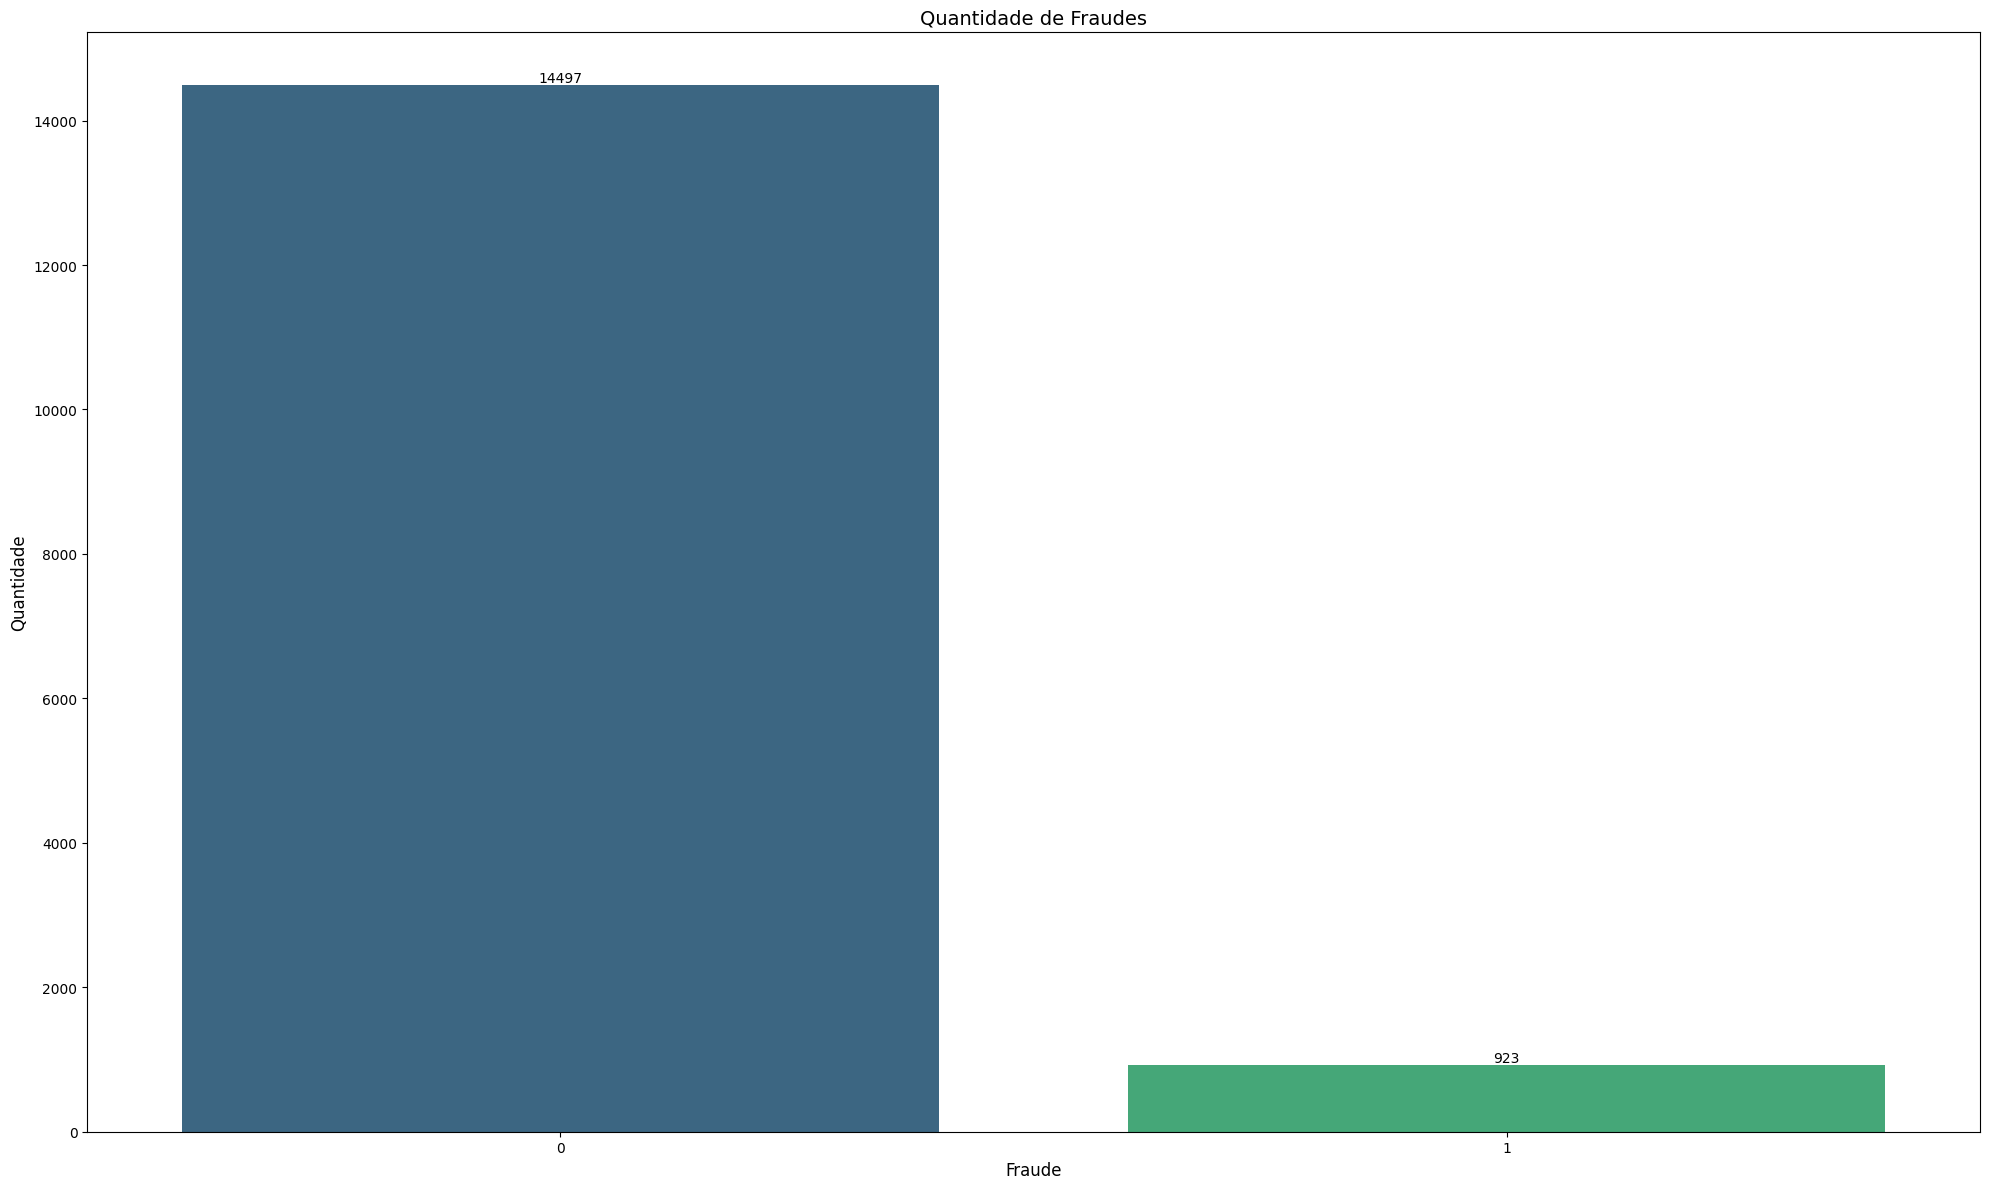

In [62]:
contagem = df['FraudFound_P'].value_counts().reset_index()
contagem.columns = ['FraudFound_P', 'Frequência']
 
plt.figure(figsize=(20, 12))
 
ax = sns.barplot(
    x='FraudFound_P',
    y='Frequência',
    data=contagem,
    palette='viridis',
    hue='FraudFound_P' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Quantidade de Fraudes', fontsize=14)
plt.xlabel('Fraude', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()

Com base nesse gráfico, podemos verificar que entre os 15420 dados levantados, apenas 923 foram apontados como fraude

Contagem de fraudes em porcentagem:
FraudFound_P
0    14497
1      923
Name: count, dtype: int64 



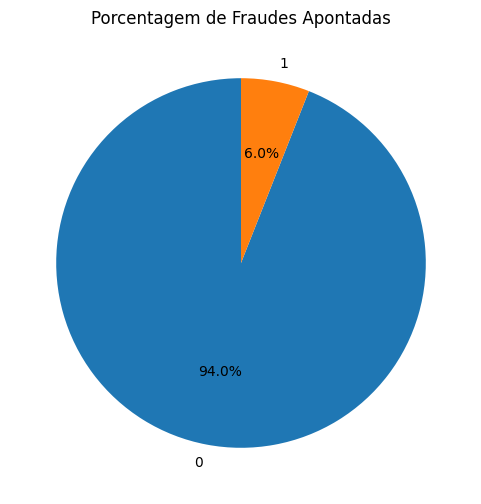

In [63]:
# Contagem de status
status_counts = df['FraudFound_P'].value_counts()

print("Contagem de fraudes em porcentagem:")
print(status_counts, "\n")

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Porcentagem de Fraudes Apontadas")
plt.show()

Apenas 6% dos dados inputados são mostrados como positivo para fraude

# Verificando a frequencia de idade apresentada

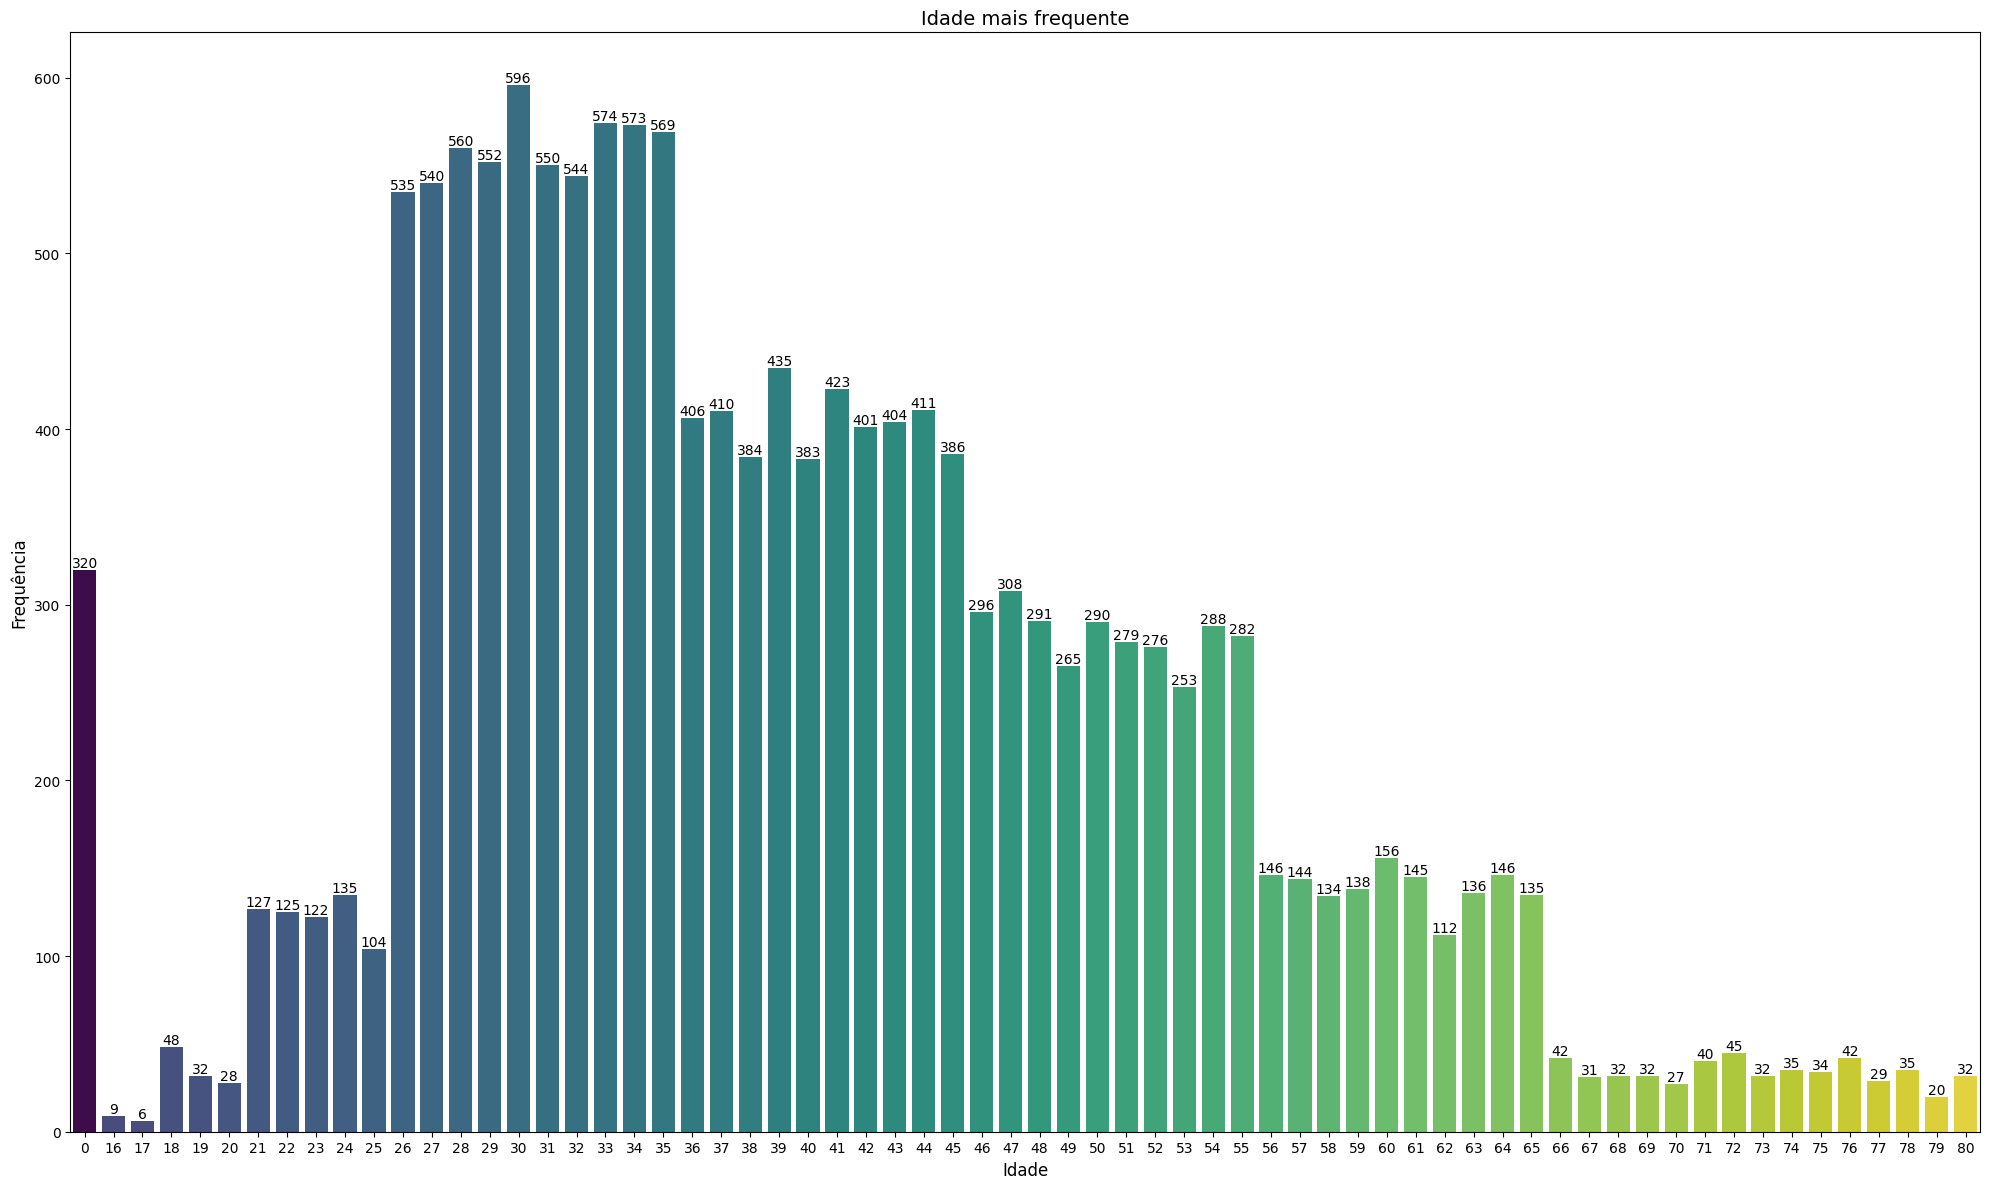

In [57]:
contagem_idade = df['Age'].value_counts().reset_index()
contagem_idade.columns = ['Age', 'Frequência']
 
plt.figure(figsize=(20, 12))
 
ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem_idade,
    palette='viridis',
    hue='Age' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Idade mais frequente', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()

Podemos verificar que a faixa etária mais apresentada no dataset se concentra nas idades entre 26 e 35 anos. Porém, temos uma informação interessante, a idade de 0 anos está sendo apresentada 320 vezes. 

### **Verificando informação com idade 0**

In [55]:
df[df['Age'] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,32,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,59,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15244,7,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


Podemos notar que apesar da informação de idade estar com o valor 0, ela não tem correlação com somente casos de fraudes, indicando apenas um possível esquecimento de preenchimento.

### **Verificando a idade mais frequente nos casos de fraude**

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_27916\2287872199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


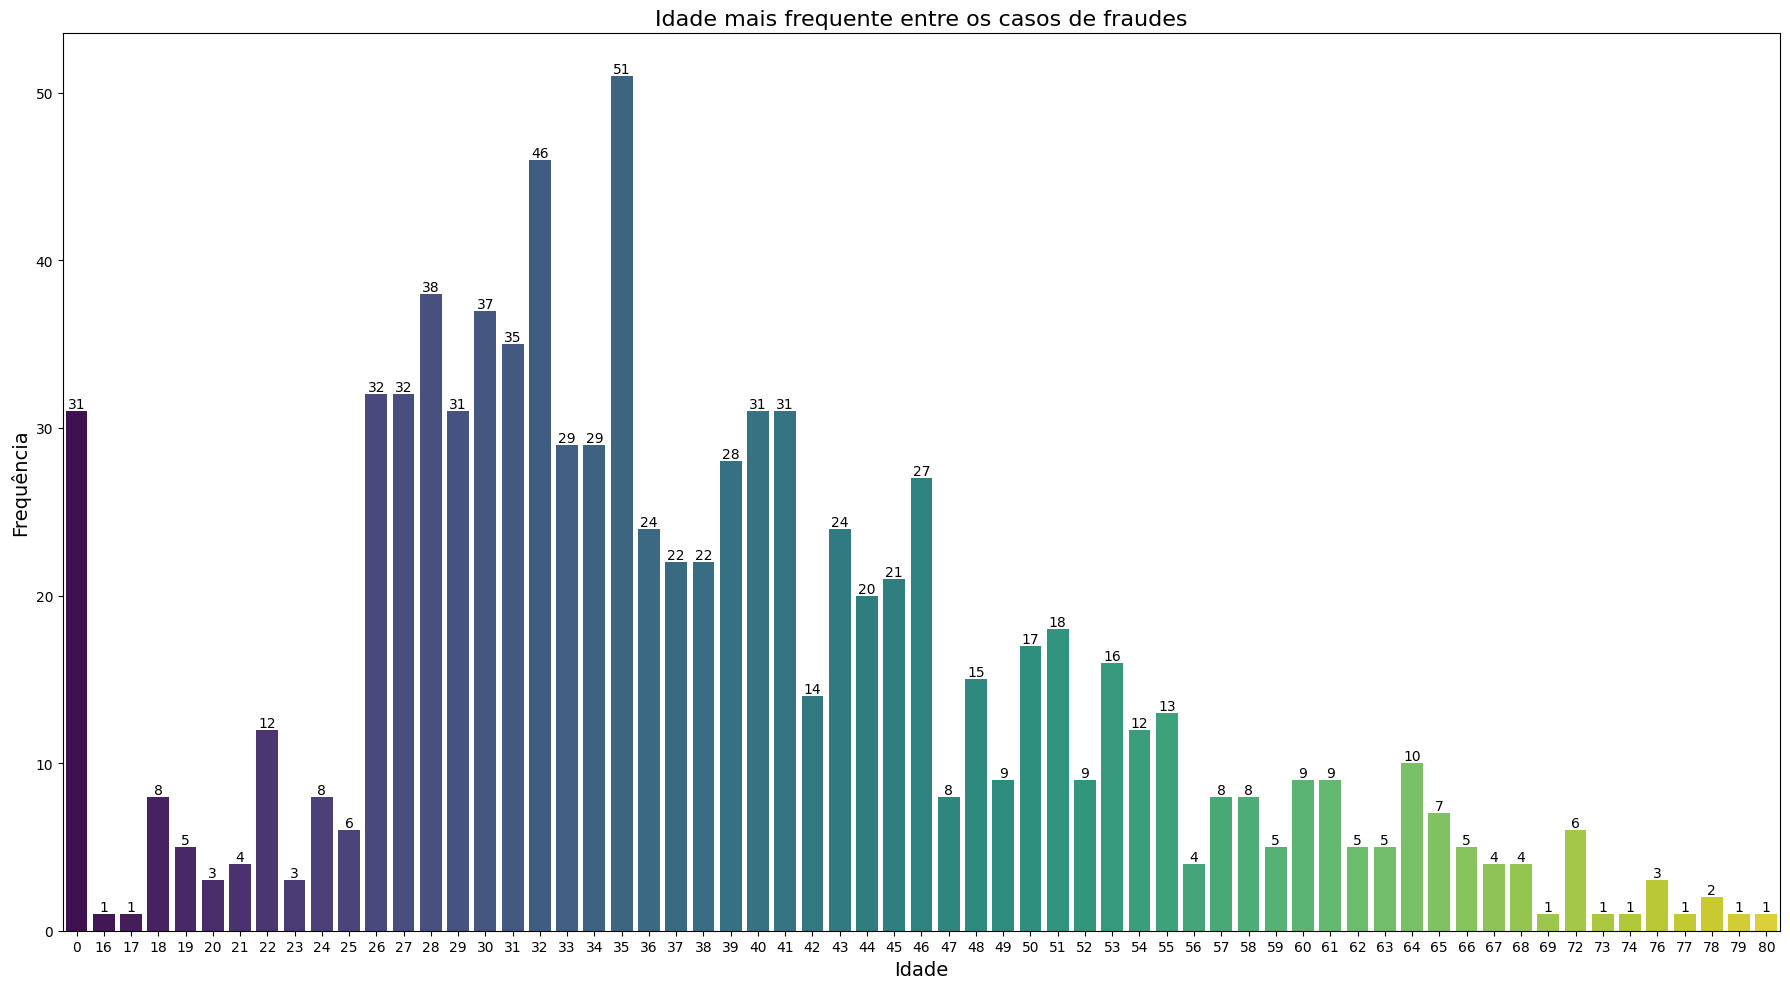

In [56]:
df_fraude = df[df['FraudFound_P'] == 1]

contagem = df_fraude['Age'].value_counts().reset_index()
contagem.columns = ['Age', 'Frequência']
contagem = contagem.sort_values(by='Age')  # ordenar para o gráfico ficar correto

plt.figure(figsize=(18, 10))

ax = sns.barplot(
    x='Age',
    y='Frequência',
    data=contagem,
    palette='viridis'
)

# Adicionar rótulos nos gráficos
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Idade mais frequente entre os casos de fraudes', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Conseguimos observar que os casos de fraudes estão ocorrendo com maior frequencia na idade de 35 anos, tendo logo em seguida a idade de 32 anos 

### **Verificar Gênero mais apresentado**

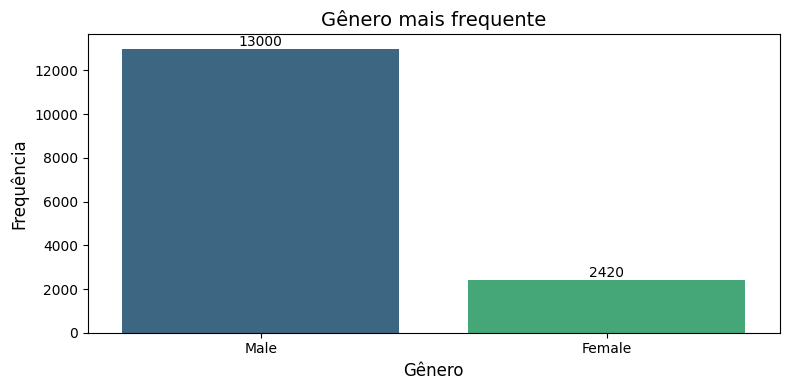

In [70]:
contagem_gen = df['Sex'].value_counts().reset_index()
contagem_gen.columns = ['Sex', 'Frequência']
 
plt.figure(figsize=(8, 4))
 
ax = sns.barplot(
    x='Sex',
    y='Frequência',
    data=contagem_gen,
    palette='viridis',
    hue='Sex' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Gênero mais frequente', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()

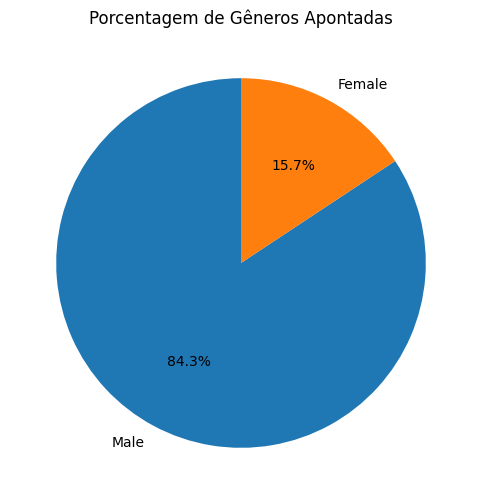

In [67]:
# Contagem de status
status_counts = df['Sex'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Porcentagem de Gêneros Apontadas")
plt.show()

De acordo com os dados inputados, o gênero predominante no dataset é masculino, sendo 84% das informações computadas.

## **Verificando Gênero com mais apontamentos de fraude**

C:\Users\Aleksander\AppData\Local\Temp\ipykernel_27916\3507639231.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


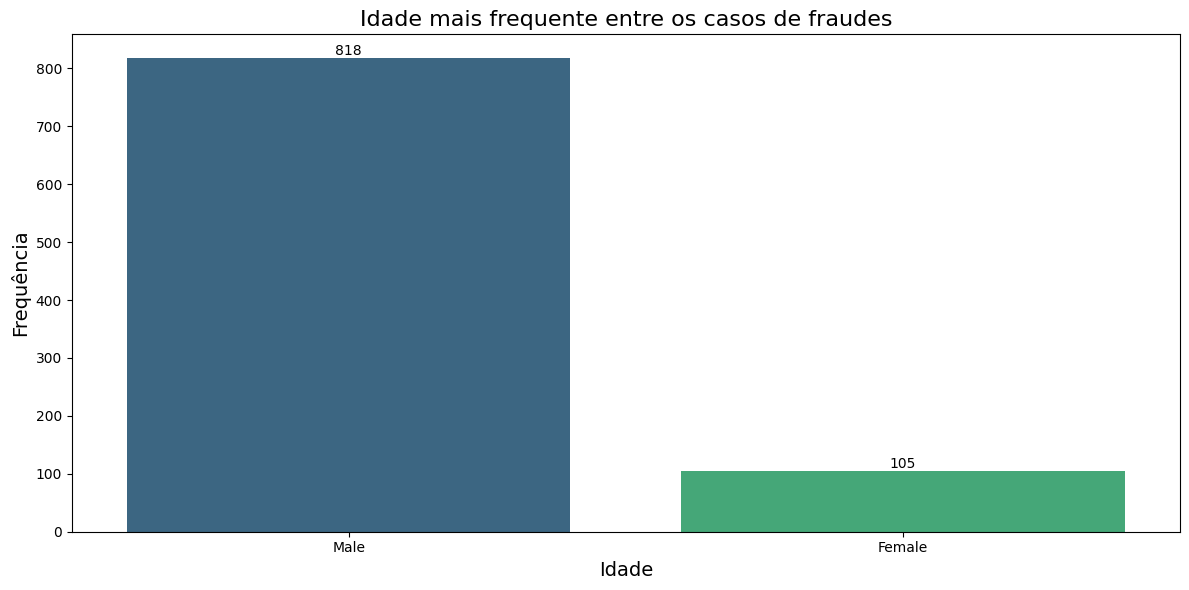

In [ ]:
df_fraude = df[df['FraudFound_P'] == 1]

contagem = df_fraude['Sex'].value_counts().reset_index()
contagem.columns = ['Sex', 'Frequência']
#contagem = contagem.sort_values(by='Sex')  # ordenar para o gráfico ficar correto

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Sex',
    y='Frequência',
    data=contagem,
    palette='viridis'
)

# Adicionar rótulos nos gráficos
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Gênero mais frequente entre os casos de fraudes', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### **Verificando o Estado Civil**

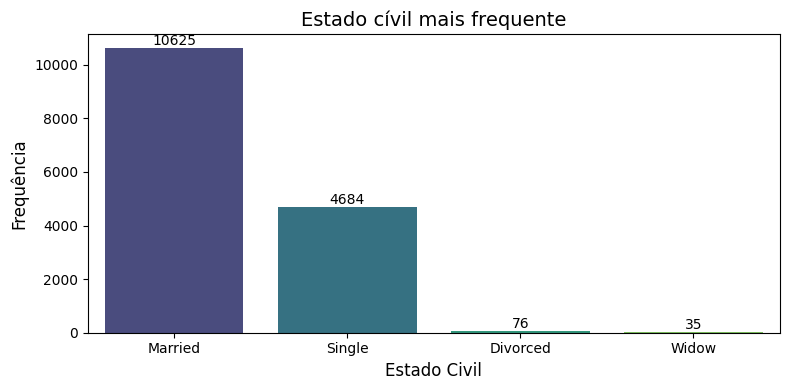

In [68]:
contagem_gen = df['MaritalStatus'].value_counts().reset_index()
contagem_gen.columns = ['MaritalStatus', 'Frequência']
 
plt.figure(figsize=(8, 4))
 
ax = sns.barplot(
    x='MaritalStatus',
    y='Frequência',
    data=contagem_gen,
    palette='viridis',
    hue='MaritalStatus' # Corrigindo o warning de depreciação
)
 

# Adicionar Rótulos de Dados (Frequência)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
 
plt.title('Estado cívil mais frequente', fontsize=14)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
 
# Ocultar a legenda (Correção alternativa ao erro)
if ax.legend_:
    ax.legend_.remove()
 
plt.tight_layout()
plt.show()


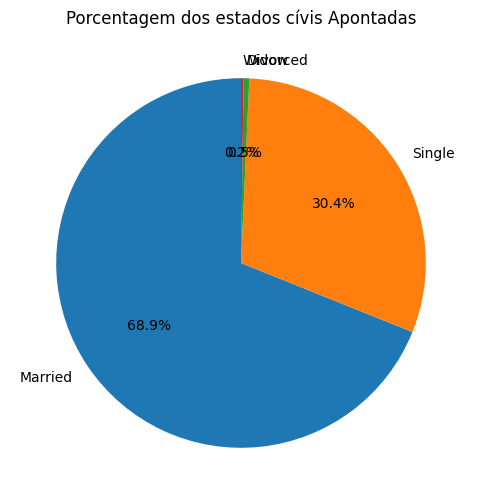

In [80]:
# Contagem de status
status_counts = df['MaritalStatus'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Porcentagem dos estados cívis Apontadas")
plt.show()